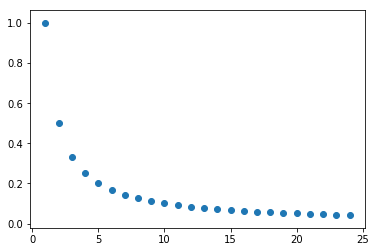

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
xs = range(1, 25)
ys = [1 / x for x in xs]
plt.scatter(xs, ys);

In [2]:
1 + 2

3